In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy
import matplotlib.image as mpimg
import imageio
from scipy.stats import pearsonr
import statsmodels.api
import statsmodels.formula.api
from matplotlib import pyplot
%matplotlib inline

In [2]:
fichier_1 = "C:/Users/Utilisateur/Desktop/Brief_projet/declaration_avantage_2020_02_19_04_00.csv" 
avantage = pd.read_csv(fichier_1, sep=";")

fichier_2 = "C:/Users/Utilisateur/Desktop/Brief_projet/declaration_convention_2020_02_19_04_00.csv" 
convention = pd.read_csv(fichier_2, sep=";")

fichier_3 = "C:/Users/Utilisateur/Desktop/Brief_projet/declaration_remuneration_2020_02_19_04_00.csv" 
remuneration = pd.read_csv(fichier_3, sep=";")

fichier_4 = "C:/Users/Utilisateur/Desktop/Brief_projet/entreprise_2020_02_19_04_00.csv" 
entreprise = pd.read_csv(fichier_4, sep=",")


C:\Users\Utilisateur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#avantage.info() # affiche les informations de la table avantage
##print("les donnaées statistiques de la base avantage")
#avantage.describe().round(2)# affichage des donnees statistiques de la table avantage avec 2 chiffres en arrondi
categorie_benef_avantage = avantage.groupby('categorie')["entreprise_identifiant"].count() #compte les données selon la qualite des beneficiaires
#print("Le nombre par categorie des beneficiaires est")
#print(categorie_benef_avantage) # Affichage des valeurs par categorie
df_avant_plus = pd.DataFrame(categorie_benef_avantage)
#print(df_avant_plus) # Affichage du dataframe
df_avant_plusR = df_avant_plus['entreprise_identifiant'].sort_values()
print(df_avant_plusR)


categorie
Vétérinaire Personne Morale                                                                       45
Groupement sanitaire                                                                              59
Groupement professionels agricoles                                                               105
Association d'étudiants                                                                          117
Editeur de logiciel                                                                              273
Presse et média                                                                                 4317
Association usager de santé                                                                     5946
Académies, Fondation, sociétés savantes, organismes de conseils                                10738
Personnes morales assurant la formation initiale ou continue des professionnels de santé       11500
Etablissement de santé                                                           

In [5]:
dicto = {}
dicto = df_avant_plusR
#print("le dict est", dict)
liste1_categ_benef_avant = [] 
liste2_categ_benef_avant = [] 
j = 0
somme = 0

for cle,valeur in dicto.items():
    #print(cle, valeur)
    if valeur > 10000 :
       # print(cat)
        liste2_categ_benef_avant.append(valeur)# recupération des valeurs des catégories
        liste1_categ_benef_avant.append(cle) # recupération des noms des categories
        j = j + 1
    else :
        somme = somme + valeur
        #liste_categ_benef_avant[j] = somme

liste2_categ_benef_avant.append(somme)
liste1_categ_benef_avant.append("Autres")
#Création d'un dataframe qui stocke les données
categ_benef_avant = pd.DataFrame({'categorie':liste1_categ_benef_avant, 'valeur':liste2_categ_benef_avant})
print(categ_benef_avant)
#categorie_benef_avantage


                                           categorie    valeur
0  Académies, Fondation, sociétés savantes, organ...     10738
1  Personnes morales assurant la formation initia...     11500
2                             Etablissement de santé     19987
3                 Association professionnel de santé     26522
4                                        Vétérinaire     59136
5                                           Etudiant    536064
6                             Professionnel de santé  10622622
7                                             Autres     10862


In [7]:
#ProfSant_benef_avantage = avantage[avantage['categorie'] == 'Professionnel de santé'].groupby('qualite')["categorie"].count()
ProfSant_benef_avantage = avantage.groupby('qualite')["categorie"].count() #compte les données selon la qualite des beneficiaires
print(ProfSant_benef_avantage)


qualite
Aide soignant                                                                36081
Ambulancier                                                                    332
Assistant dentaire                                                            1658
Audioprothésiste                                                             56630
Auxiliaire de puériculture                                                    5225
Chirurgien-dentiste                                                         148543
Diététicien                                                                  22771
Editeur de presse                                                               57
Ergothérapeute                                                                2063
Infirmier                                                                   929861
Manipulateur d’électroradiologie médicale                                   102728
Masseur-kinésithérapeute                                                     21

In [80]:
avantage[avantage['categorie'] == 'Professionnel de santé'].groupby(['qualite'])['categorie'].count() #compte les données selon la qualite des beneficiaires
#print(ProfSant_benef_avantage) 
avantage_pro_sante= avantage[avantage['categorie']=='Professionnel de santé']['qualite']
#print(avantage_pro_sante)
ProfSant_benef_avant = pd.DataFrame({'Index':avantage_pro_sante.index.values,'qualite':avantage_pro_sante}) #, 'valeur':liste2_categ_benef_avant})
print(ProfSant_benef_avant)
ProfSant_benef_avantage = ProfSant_benef_avant.groupby(['qualite'])['Index'].count() #compte les données selon la qualite des beneficiaires
print(ProfSant_benef_avantage)


             Index    qualite
0                0  Infirmier
1                1  Infirmier
2                2  Infirmier
4                4  Infirmier
5                5    Médecin
...            ...        ...
11297424  11297424    Médecin
11297427  11297427  Infirmier
11297428  11297428  Infirmier
11297429  11297429    Médecin
11297430  11297430    Médecin

[10622622 rows x 2 columns]
qualite
Aide soignant                                                                36071
Ambulancier                                                                    332
Assistant dentaire                                                            1658
Audioprothésiste                                                             56512
Auxiliaire de puériculture                                                    5224
Chirurgien-dentiste                                                         148457
Diététicien                                                                  22763
Editeur de presse     

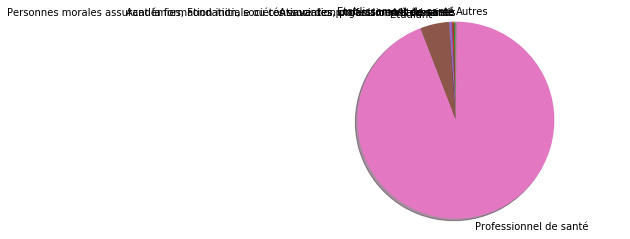

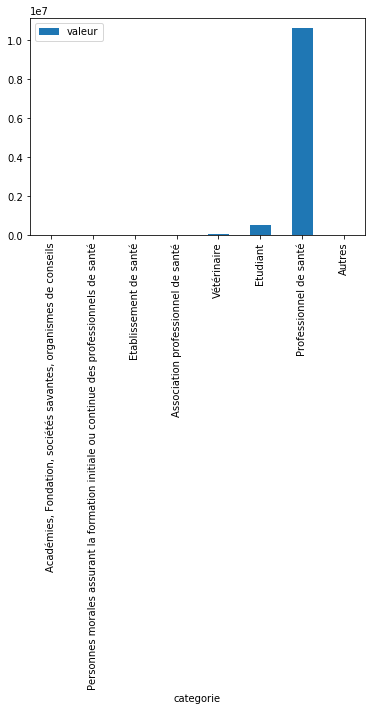

In [10]:
#plot(categ_benef_avant['categorie'],categ_benef_avant['valeur'])
name = categ_benef_avant['categorie']
data = categ_benef_avant['valeur']
plt.pie(data, labels=name, startangle=90, shadow=True)
plt.axis('equal')
plt.show()

categNew = categ_benef_avant.set_index('categorie')
categNew.plot(kind = 'bar')# pour créer l'histogramme 
#categ_benef_avant.plot(kind = 'bar')# pour créer l'histogramme ou le diagramme en bar
#df['A']
plt.show()# pour l'afficher


In [11]:
#Trouver la qualite des beneficiaires pour ceux qui ont le plus d'intervention dans la base convention
categorie_benef_convention = convention.groupby('categorie')["entreprise_identifiant"].count() #compte les données selon la qualite des beneficiaires
print("Le nombre par categorie des beneficiaires est")
print(categorie_benef_convention) # Affichage des valeurs par qualite

df_convent_plus = pd.DataFrame(categorie_benef_convention)
#print(df_avant_plus) # Affichage du dataframe
df_convent_plusR = df_convent_plus['entreprise_identifiant'].sort_values()
print(df_convent_plusR)
dicto = {}
dicto = df_convent_plusR
#print("le dict est", dict)
liste1_categ_benef_convent = [] 
liste2_categ_benef_convent = [] 
j = 0
somme = 0

for cle,valeur in dicto.items():
    #print(cle, valeur)
    if valeur > 10000 :
       # print(cat)
        liste2_categ_benef_convent.append(valeur)# recupération des valeurs des catégories
        liste1_categ_benef_convent.append(cle) # recupération des noms des categories
        j = j + 1
    else :
        somme = somme + valeur
        #liste_categ_benef_avant[j] = somme

liste2_categ_benef_convent.append(somme)
liste1_categ_benef_convent.append("Autres")
#Création d'un dataframe qui stocke les données
categ_benef_convent = pd.DataFrame({'categorie':liste1_categ_benef_convent, 'valeur':liste2_categ_benef_convent})
#print(categ_benef_convent)


Le nombre par categorie des beneficiaires est
categorie
Académies, Fondation, sociétés savantes, organismes de conseils                               69466
Association d'étudiants                                                                         719
Association professionnel de santé                                                            85803
Association usager de santé                                                                    6538
Editeur de logiciel                                                                            1092
Etablissement de santé                                                                        53235
Etudiant                                                                                     215710
Groupement professionels agricoles                                                              117
Groupement sanitaire                                                                             92
Personnes morales assurant la formation init

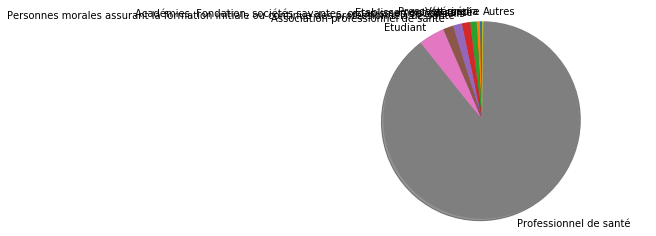

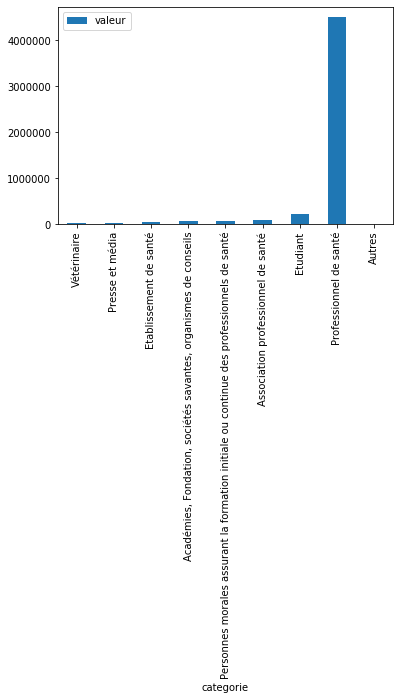

In [12]:
#categ_benef_convent.plot(kind = 'bar')# pour créer l'histogramme ou le diagramme en bar
name = categ_benef_convent['categorie']
data = categ_benef_convent['valeur']
plt.pie(data, labels=name, startangle=90, shadow=True)
plt.axis('equal')
plt.show()
categNew = categ_benef_convent.set_index('categorie')
categNew.plot(kind = 'bar')# pour créer l'histogramme 
#categ_benef_avant.plot(kind = 'bar')# pour créer l'histogramme ou le diagramme en bar
#df['A']
plt.show()# pour l'afficher


In [13]:
#Trouver la qualite des beneficiaires pour ceux qui ont le plus d'intervention dans la base remuneration
categorie_benef_remuneration = remuneration.groupby('categorie')["entreprise_identifiant"].count() #compte les données selon la qualite des beneficiaires
print("Le nombre par categorie des beneficiaires est")
print(categorie_benef_remuneration) # Affichage des valeurs par qualite
#Traitement des infos
df_remune_plus = pd.DataFrame(categorie_benef_remuneration)
#print(df_avant_plus) # Affichage du dataframe
df_remune_plusR = df_remune_plus['entreprise_identifiant'].sort_values()

dicto = {}
dicto = df_remune_plusR
#print("le dict est", dict)
liste1_categ_benef_remune = [] 
liste2_categ_benef_remune = [] 
j = 0
somme = 0

for cle,valeur in dicto.items():
    #print(cle, valeur)
    if valeur > 10000 :
       # print(cat)
        liste2_categ_benef_remune.append(valeur)# recupération des valeur des catégories
        liste1_categ_benef_remune.append(cle) # recupération des nom des categories
        j = j + 1
    else :
        somme = somme + valeur
        #liste_categ_benef_avant[j] = somme

liste2_categ_benef_remune.append(somme)
liste1_categ_benef_remune.append("Autres")
#Création d'un dataframe qui stocke les données
categ_benef_remune = pd.DataFrame({'categorie':liste1_categ_benef_remune, 'valeur':liste2_categ_benef_remune})
print(categ_benef_remune)


Le nombre par categorie des beneficiaires est
categorie
Académies, Fondation, sociétés savantes, organismes de conseils                              64750
Association d'étudiants                                                                        243
Association professionnel de santé                                                           31473
Association usager de santé                                                                   1766
Editeur de logiciel                                                                            341
Etablissement de santé                                                                       29193
Etudiant                                                                                       249
Groupement professionels agricoles                                                              68
Groupement sanitaire                                                                            62
Personnes morales assurant la formation initiale ou c

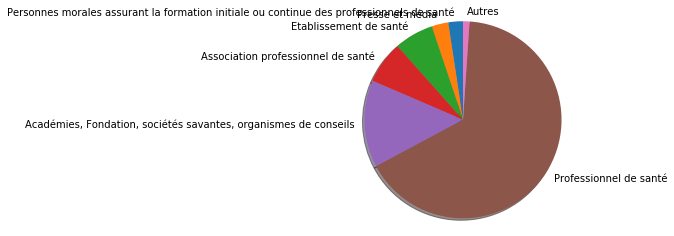

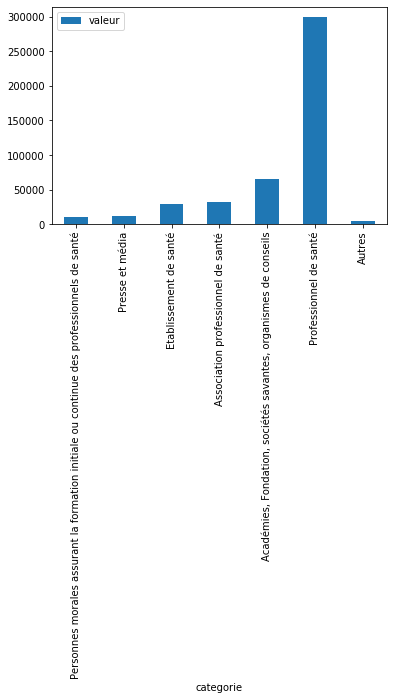

In [14]:
name = categ_benef_remune['categorie']
data = categ_benef_remune['valeur']
plt.pie(data, labels=name, startangle=90, shadow=True)
plt.axis('equal')
plt.show()
categNew = categ_benef_remune.set_index('categorie')
categNew.plot(kind = 'bar')# pour créer l'histogramme 
#categ_benef_avant.plot(kind = 'bar')# pour créer l'histogramme ou le diagramme en bar
#df['A']
plt.show()# pour l'afficher


In [15]:
#Trouver la liste des enttreprises par secteur
secteur_entreprise = entreprise.groupby('secteur')["identifiant"].count() #compte les données par secteur des entreprises
print("Le nombre des entreprises par secteur est")
print(secteur_entreprise) # Affichage des valeurs par qualite
#Traitement des infos

Le nombre des entreprises par secteur est
secteur
Autres                                          428
Dispositifs médicaux                           1352
Dispositifs médicaux de diagnostic in vitro     108
Médicament vétérinaire                           33
Médicaments humains                             722
Prestataires associés                           433
Produits cosmétiques                             77
Name: identifiant, dtype: int64


In [16]:
#Création de la dataframe contenant les trois tableaux de valeurs
data_conl = pd.DataFrame({"Avantage":liste2_categ_benef_avant[0:7],"Convention":liste2_categ_benef_convent[0:7],
                         "remuneration":liste2_categ_benef_remune[0:7]})
print(data_conl)

   Avantage  Convention  remuneration
0     10738       17330         10886
1     11500       27637         12386
2     19987       53235         29193
3     26522       69466         31473
4     59136       73334         64750
5    536064       85803        299533
6  10622622      215710          4804


In [17]:
#df_avant_plusR, df_convent_plusR, df_remune_plusR
# df_avant_plusR.values
Resume_val = pd.DataFrame({"Avantage":df_avant_plusR.values,"Convention":df_convent_plusR.values,"remuneration":df_remune_plusR.values})
print(Resume_val)

    Avantage  Convention  remuneration
0         45          92            62
1         59         117            68
2        105         719           243
3        117        1092           249
4        273        1507           341
5       4317        6538          1003
6       5946       17330          1072
7      10738       27637          1766
8      11500       53235         10886
9      19987       69466         12386
10     26522       73334         29193
11     59136       85803         31473
12    536064      215710         64750
13  10622622     4502778        299533


In [82]:
Resume_val.describe().round(2)# affichage des donnees statistiques avec 2 chiffres en arrondi 

,Avantage,Convention,remuneration
count,14.00,14.00,14.00
mean,806959.36,361097.00,32358.93
std,2828641.92,1193494.43,79116.95
min,45.00,92.00,62.00
25%,156.00,1195.75,272.00
50%,8342.00,22483.50,1419.00
75%,24888.25,72367.00,24991.25
max,10622622.00,4502778.00,299533.00


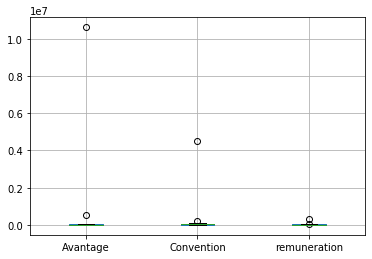

In [81]:
# Les boîtes à moustaches, il faut passer par le DataFrame pour l'afficher, et choisir une variable 
# spécifiquement éventuellement.
Resume_val.boxplot()

(0, 80000)

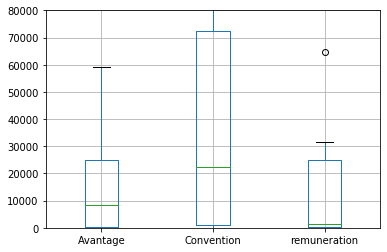

In [65]:
# Les boîtes à moustaches, il faut passer par le DataFrame pour l'afficher, et choisir une variable 
# spécifiquement éventuellement.
Resume_val.boxplot()
pyplot.ylim(0, 80000)

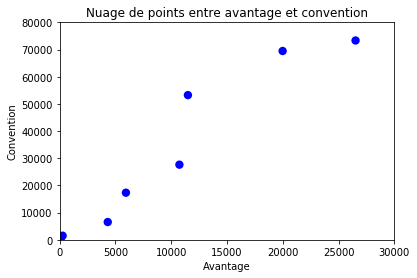

coefficient de Pearson = 0.9997569705259703


In [87]:
# Analyse de la corrélation entre les valeurs avantage par catégorie de professionnel et les valeurs
# convention par catégorie de profession
listeX = Resume_val['Avantage']
listeY = Resume_val['Convention']
#On fait un plot de x en fonction de y
plt.scatter(listeX,listeY,c = ['blue'], s = [70],marker = 'o', edgecolors = 'none')
plt.plot([0, 4], [0, 8], color = 'red', linestyle = 'solid')
plt.title('Nuage de points entre avantage et convention')
axes = pyplot.gca()
axes.set_xlabel('Avantage')
axes.set_ylabel('Convention')
pyplot.xlim(0, 30000)
pyplot.ylim(0, 80000)
plt.show()# pour l'afficher
coeff_pearson,_ = pearsonr(listeX,listeY)
print("coefficient de Pearson = {}".format(coeff_pearson))

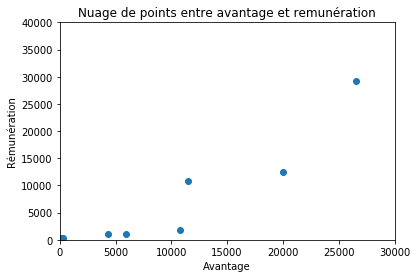

coefficient de Pearson = 0.9809870773118603


In [89]:
# Analyse de la corrélation entre les valeurs avantage par catégorie de professionnel et les valeurs
# remuneration par catégorie de profession
listeX = Resume_val['Avantage']
listeY = Resume_val['remuneration']
#On fait un plot de x en fonction de y
plt.scatter(listeX,listeY)
plt.title('Nuage de points entre avantage et remunération')
axes = pyplot.gca()
axes.set_xlabel('Avantage')
axes.set_ylabel('Rémunération')
pyplot.xlim(0, 30000)
pyplot.ylim(0, 40000)
plt.show()# pour l'afficher
coeff_pearson,_ = pearsonr(listeX,listeY)
print("coefficient de Pearson = {}".format(coeff_pearson))

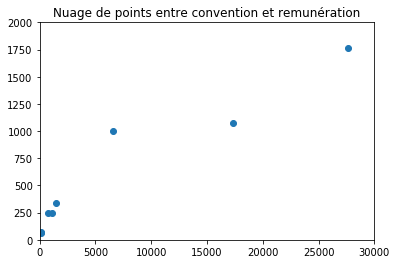

coefficient de Pearson = 0.9820246731847797


In [86]:
listeX = Resume_val['Convention']
listeY = Resume_val['remuneration']
#On fait un plot de x en fonction de y
plt.scatter(listeX,listeY)
plt.title('Nuage de points entre convention et remunération')
axes.set_xlabel('Convention')
axes.set_ylabel('Rémunération')
pyplot.xlim(0, 30000)
pyplot.ylim(0, 2000)
plt.show()# pour l'afficher
coeff_pearson,_ = pearsonr(listeX,listeY)
print("coefficient de Pearson = {}".format(coeff_pearson))

In [53]:
#df = pd.DataFrame({"Avantage":liste2_categ_benef_avant[0:7],"Convention":liste2_categ_benef_convent[0:7]})
#fit = statsmodels.formula.api.ols('Avantage ~ Convention', data = df).fit()
fit = statsmodels.formula.api.ols('Avantage ~ Convention', data = Resume_val).fit()

In [54]:
table = statsmodels.api.stats.anova_lm(fit)
print(table)

              df        sum_sq       mean_sq             F        PR(>F)
Convention   1.0  1.039652e+14  1.039652e+14  24679.363881  2.973168e-21
Residual    12.0  5.055167e+10  4.212639e+09           NaN           NaN


In [56]:
#Resume_val = pd.DataFrame({"convention":liste2_categ_benef_convent[0:7],"remuneration":liste2_categ_benef_remune[0:7]})
fit = statsmodels.formula.api.ols('Convention ~ remuneration', data = Resume_val).fit()

In [57]:
table = statsmodels.api.stats.anova_lm(fit)
print(table)

                df        sum_sq       mean_sq           F        PR(>F)
remuneration   1.0  1.785784e+13  1.785784e+13  324.818079  4.685598e-10
Residual      12.0  6.597357e+11  5.497798e+10         NaN           NaN
